<a href="https://colab.research.google.com/github/OussamaAssou/Dataleon_TEST/blob/main/Dataleon_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PyTorch is an open-source machine learning framework that is primarily used
#for building deep neural networks. It is widely used for various tasks, 
#such as image and speech recognition, natural language processing
import torch

#The torch.nn.functional module provides a set of functions for building 
#neural networks in PyTorch
import torch.nn.functional as F

#The torch.utils.data module provides tools for working with data in PyTorch. 
#It includes classes and functions for creating and manipulating datasets, 
#loading data in parallel using DataLoader
from torch.utils.data import Dataset, DataLoader

#torchvision is a package in PyTorch that provides some basic image and video 
#datasets, as well as some commonly used models for image and video 
#classification, object detection, and segmentation.
import torchvision

#torchvision.transforms provides a set of functions for image and video 
#preprocessing, such as random cropping, normalization, and data augmentation.
from torchvision import transforms

#FastRCNNPredictor is a class in the torchvision.models.detection.faster_rcnn 
#module that is used for object detection using the Faster R-CNN model.
#The Faster R-CNN model is a popular object detection algorithm that uses 
#a region proposal network (RPN) to generate potential object regions, and 
#then uses a Fast R-CNN network to classify those regions and refine their 
#bounding boxes.
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

#PIL stands for Python Imaging Library, which is a third-party library used 
#for opening, manipulating, and saving many different image file formats
from PIL import Image as Im

#numpy is a third-party Python library used for scientific computing. 
#It provides a high-performance multidimensional array object, along with 
#tools for working with these arrays.
import numpy as np

#glob is a Python module used to find all the pathnames matching a specified 
#pattern according to the rules used by the Unix shell. The glob module 
#provides a function called glob.glob() that takes a pathname pattern and 
#returns a list of all the matching pathnames.
import glob

#json is a built-in Python module that provides methods for working with JSON 
#(JavaScript Object Notation) data. JSON is a lightweight data interchange 
#format that is easy for humans to read and write and easy for machines 
#to parse and generate.
import json

#copy is a built-in Python module that provides methods for creating and 
#manipulating copies of Python objects.
import copy

#matplotlib is a popular third-party Python library used for creating 2D plots 
#and graphs
import matplotlib.pyplot as plt

#matplotlib.patches is a module in the matplotlib library that provides 
#various classes for drawing geometric shapes on a plot.
from matplotlib.patches import Rectangle

#PatchCollection is a class in the matplotlib.collections module that is 
#used to group multiple Patch objects together and display them as a single 
#entity on a plot.
from matplotlib.collections import PatchCollection

#Patch is a base class in the matplotlib.patches module that defines the 
#interface for creating patches, which are geometric shapes that can be 
#added to a plot.
from matplotlib.patches import Patch

 #a built-in module that provides a way of interacting with the operating 
 #system.
import os

# mount your Google Drive as a virtual file system.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DIRECTORY CONTAINING DATA (DATASET FOLDER IN G. DRIVE)

In [ ]:
#change the current working directory to a folder named "DATASET" in the 
#"My Drive" directory of your Google Drive.
%cd "/content/drive/My Drive/DATASET"

#list the files and directories in the current working directory.
!ls

/content/drive/My Drive/DATASET
dev  test  train


DATA ANALYSIS

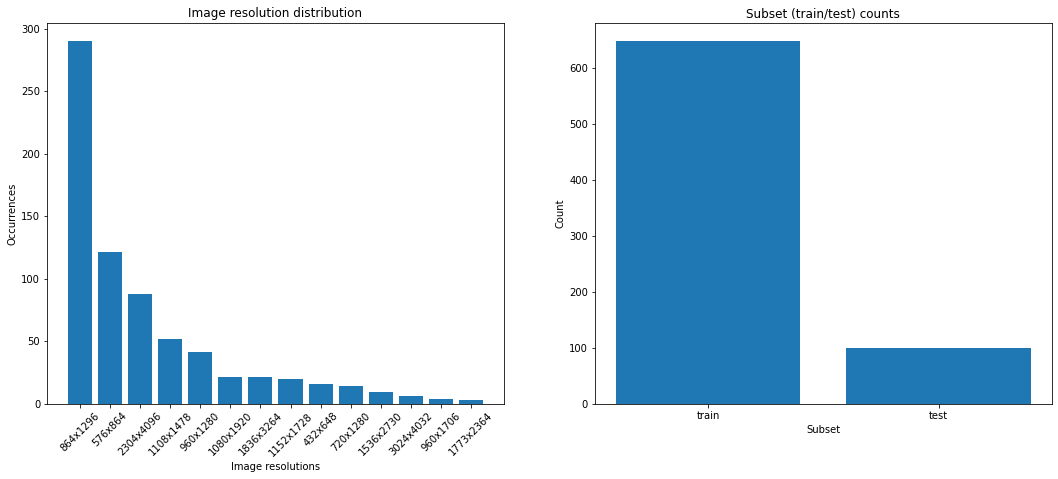

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# initialize an empty dictionary called shapes.
shapes = {}

# import the glob module and use it to retrieve the file paths of all PNG images
# in the specified directories. 
# These file paths are stored in two separate lists, train_files and test_files, 
# using the list function. The + operator is then used to concatenate these lists 
# into a single list called files.
train_files = list(glob.glob('/content/drive/My Drive/DATASET/train/image/*.png')) 
test_files = list(glob.glob('/content/drive/My Drive/DATASET/test/image/*.png'))
files = train_files + test_files

# read each image file in the files list and check the size of the image using 
# the Image.open function from the PIL
# count the number of images with that size and stores the result in the shapes 
# dictionary using the image size as the key and the count as the value.
for img_file in files:
  img = Image.open(img_file)
  if img.size in shapes:
    shapes[img.size] += 1
  else:
    shapes[img.size] = 1

# The last line of code creates a figure with two subplots using the subplots 
# function from the matplotlib module. The figsize argument specifies the width and 
# height of the figure in inches.
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# The resulting shapes dictionary is a subset of the original shapes dictionary, 
# containing only the most common image sizes with a count greater than 2, and sorted by frequency.
shapes = dict(filter(lambda elem: elem[1] > 2, shapes.items()))
shapes = dict(sorted(shapes.items(), key=lambda item: item[1], reverse=True))

# The xticks list can be passed to a plotting function as the tick_labels argument 
# to label the x-axis with the corresponding image sizes.
xticks = [f'{res[0]}x{res[1]}' for res in shapes.keys()]

# plot resolutions histogram
axs[0].bar(xticks, shapes.values()) # x : list of values representing the different image resolutions. y :  corresponding occurrences for each resolution
axs[0].set_xticklabels(xticks, rotation=45) # set the labels for each tick on the x-axis using the values in xticks
axs[0].set_xlabel('Image resolutions')
axs[0].set_ylabel('Occurrences')
axs[0].set_title('Image resolution distribution')

# plot train/test counts
axs[1].bar(['train', 'test'], [len(train_files), len(test_files)])
axs[1].set_xlabel('Subset')
axs[1].set_ylabel('Count')
axs[1].set_title('Subset (train/test) counts')

plt.show()

To minimize distortions in the data, I chose to use a main resolution of 1296x864, and I resized all images and TTC bounding boxes accordingly. As the dataset is relatively small, training a model from scratch would be challenging, so I decided to use a fine-tuning approach with a pre-trained model. For this, I selected Faster R-CNN with a ResNet-50 FPN backbone. This model is one of the state-of-the-art models and can handle the varying sizes of tickets and ROIs. Additionally, ResNet-50 strikes a good balance between model capacity and complexity, and the residual connections help prevent overfitting.

The pre-trained models were trained on COCO image segmentation and object detection database. Although it is not strictly necessary to resize images to use Faster R-CNN, I resized the images to facilitate batch processing with a batch size greater than one.

Preprocessing data involves performing various operations on raw data to make it suitable for analysis or use in a machine learning model. This can include tasks such as parsing JSON files, resizing images, normalizing data, and converting data into a format that can be easily fed into a model.

Parsing JSON files involves extracting the relevant data from a JSON file and converting it into a more usable format, such as a dictionary or list. This can be useful for accessing specific data fields, filtering data based on certain criteria, or combining data from multiple sources.

Resizing images involves adjusting the dimensions of an image to a specific size or aspect ratio, which can be important for maintaining consistency across a dataset or reducing the computational resources required for analysis. This can be achieved using various libraries and techniques, such as OpenCV, Pillow, or scikit-image.

Normalization involves scaling data to a common range or distribution, which can be important for improving the accuracy and convergence of machine learning models. This can be achieved using various techniques, such as min-max scaling, z-score normalization, or feature scaling.

Converting data into a format that can be easily fed into a model involves transforming the data into a matrix or tensor with a specific shape and data type. This can involve encoding categorical variables, splitting data into training and testing sets, or transforming text or audio data into a numeric format. This is typically done using libraries such as NumPy or pandas.

In [ ]:
def get_price_bb_from_json_file(json_content):
    """ Parse and return TTC bounding box from JSON content """

    # get only VALID json entries
    valid = json_content['valid_line']

    # if the tag TOTAL_PRICE is present, use it as a target
    prices = [x for x in valid if x['category'] == 'total.total_price']

    # else, if CASHPRICE is present, use it as a target
    if len(prices) == 0:
        prices = [x for x in valid if x['category'] == 'total.cashprice']

    # else, if CREDITCARDPRICE is present, use it as a target
    if len(prices) == 0:
        prices = [x for x in valid if x['category'] == 'total.creditcardprice']

    # else, if SUBTOTAL_PRICE is present, use it as a target
    if len(prices) == 0:
        prices = [x for x in valid if x['category'] == 'sub_total.subtotal_price']

    # For some images, none of the previous tags are present, for these few images use CHANGEPRICE
    if len(prices) == 0:
        prices = [x for x in valid if x['category'] == 'total.changeprice']

    for p in prices:
        words = p['words']

        # get price value and price tag ("Price", "total") bounding boxes
        price_value = [x['quad'] for x in words if x['is_key'] == 0]
        price_tag = [x['quad'] for x in words if x['is_key'] == 1]

        if len(price_value) > 0:
            if len(price_tag) > 0:
                # if both are present, return the full bounding box
                return np.array([min(price_value[0]['x1'], price_tag[0]['x1']), 
                                 min(price_value[0]['y1'], price_tag[0]['y1']),  
                                 max(price_value[0]['x2'], price_tag[0]['x2']), 
                                 max(price_value[0]['y4'], price_tag[0]['y4'])])
            else:
                # else, return the price value bounding box
                return np.array([price_value[0]['x1'], price_value[0]['y1'],  
                                 price_value[0]['x2'], price_value[0]['y4']])                 
    return None

class BoundingBoxRescale(object):
    """Rescale TTC bounding box"""
    
    def __init__(self, new_shape):
        assert isinstance(new_shape, tuple)
        self.new_shape = new_shape

    def __call__(self, sample, original_shape):
        w_ratio = self.new_shape[0] / original_shape[0]
        h_ratio = self.new_shape[1] / original_shape[1]

        # return [sample[1]*h_ratio, sample[0]*w_ratio, sample[3]*h_ratio, sample[2]*w_ratio]
        return [sample[0]*h_ratio, sample[1]*w_ratio, sample[2]*h_ratio, sample[3]*w_ratio]

class CORDataset(Dataset):
    """ PyTorch Dataset wrapper for CORD dataset """

    def __init__(self, root_data_dir, subset, img_transform=None, bb_transform=None):
        assert subset in ['train', 'test']

        self.data_dir = os.path.join(root_data_dir, subset)
        self.subset = subset
        self.img_transform = img_transform
        self.bb_transform = bb_transform

        self.images_paths = os.listdir(os.path.join(self.data_dir, 'image'))
        self.targets_paths = os.listdir(os.path.join(self.data_dir, 'json'))

    def __len__(self):
        return len(self.images_paths)

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()

        image_file_name = self.images_paths[index]
        image_path = os.path.join(self.data_dir, 'image', image_file_name)

        json_file_name = image_file_name.replace('png', 'json')
        json_file_path = os.path.join(self.data_dir, 'json', json_file_name)

        # get TTC bounding box from JSON
        with open(json_file_path, 'r') as target_file:
            target_data = json.load(target_file)
            price_bounding_box = get_price_bb_from_json_file(target_data)

        image = Image.open(image_path)

        if self.bb_transform:
            price_bounding_box = self.bb_transform(price_bounding_box, original_shape=(image.size[1], image.size[0]))

        if self.img_transform:
            image = self.img_transform(image)

        # create appropriate target format for Faster R-CNN (given by PyTorch documentation)
        target = {}
        target['boxes'] = torch.FloatTensor([price_bounding_box])
        target['labels'] = torch.ones((1,), dtype=torch.int64)
        target['image_id'] = torch.tensor([index])
        target['area'] = torch.tensor([(price_bounding_box[3] - price_bounding_box[1]) * (price_bounding_box[2] - price_bounding_box[0])])
        target['iscrowd'] = torch.zeros((1,), dtype=torch.int64)

        return image, target

TRANSFORMERS & VISUALIZATION

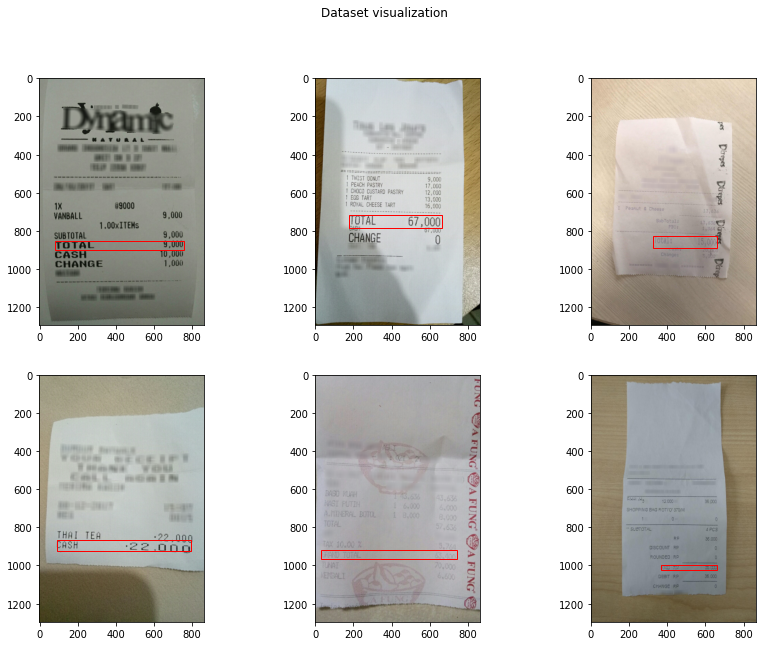

In [ ]:
new_shape = (1296, 864) # Image new shape

# image transformer consists of resizing to previous shape and transforming to channel-first format with 0-1 range pixels
img_transform = transforms.Compose([transforms.Resize(size=new_shape),
                                    transforms.ToTensor()])

# TTC bounding box transformer consists of resizing the bounding box according to the new image shape
bb_transform = BoundingBoxRescale(new_shape=new_shape)

# creating a temporary dataset and dataloader
ds = CORDataset(root_data_dir='/content/drive/My Drive/DATASET', subset='train', img_transform=img_transform, bb_transform=bb_transform)
data_loader = torch.utils.data.DataLoader(ds, batch_size=1, num_workers=0)

def visualize_dataset(dataset, n_rows, n_columns):
    """ Visualize n_rows * n_columns elements of the dataset with TTC bouding boxes """

    np.random.seed(50)
    indexes = np.random.randint(0, len(dataset), n_rows * n_columns)
    
    fig, axs = plt.subplots(n_rows, n_columns, figsize=(14, 10))

    for idx, sample_idx in enumerate(indexes):
        img, bb = dataset[sample_idx]
        bb = bb["boxes"][0]
        img = transforms.ToPILImage()(img)
        axs[idx // n_columns, idx % n_columns].imshow(img)

        bb = Rectangle(xy=(bb[0], bb[1]), width=bb[2] - bb[0],
                                height=bb[3] - bb[1], 
                                linewidth=1, edgecolor='r', facecolor='none')
        
        axs[idx // n_columns, idx % n_columns].add_patch(bb)
    plt.suptitle('Dataset visualization')
    plt.show()      

# visualize 6 elements
visualize_dataset(dataset=ds, n_rows=2, n_columns=3)

# remove temporary dataset and dataloader
del ds
del data_loader